<a href="https://colab.research.google.com/github/ArslanAmanov/AI-ML-DL/blob/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/uci_ml%20drug%20test%20ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Drug Ratings Dataset: Preliminary Data Exploration  **
Preliminary Exploration:


*   Most common conditions
*   Overall best and worst reviewed drugs


*   The curability of each disease
*   Best drugs for each condition

*   Most useful reviews
*   Usefulness vs review score

*   Bias in reviews
*   Users tend to review things they really like or really disliked,fewer reviews in the middle.









In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style; style.use('ggplot')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [5]:
# import dataframes

#Importing the datasets and libraries
url_1_test='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTest_raw.csv'
url_2_train='https://raw.githubusercontent.com/ArslanAmanov/AI-ML-DL/default-branch/Kaggle%20Projects%20/UCI%20ML%20drug%20dataset/drugsComTrain_raw.csv'
test = pd.read_csv(url_1_test)
train = pd.read_csv(url_2_train)

In [6]:
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [7]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [8]:
list(train)==list(test)

True

Both train and test have the same features.Maybe they are split up to allow us to train/test our models easily.

In [9]:
list(train)

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [10]:
train.values.shape[0], test.values.shape[0], train.values.shape[0]/test.values.shape[0]

(161297, 53766, 2.999981400885318)

Yes, the train set is almost exactly 3 times as big as the test set. This is typical 75:25 train:test split.

In [11]:
train.condition.unique().size, test.condition.unique().size

(885, 709)

In [12]:
train.drugName.unique().size, test.drugName.unique().size

(3436, 2637)

**Common Conditions**

In [13]:
conditions = train.condition.value_counts().sort_values(ascending=False)
conditions[:10]

condition
Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: count, dtype: int64

In [14]:
plt.rcParams['figure.figsize']=[12,8]

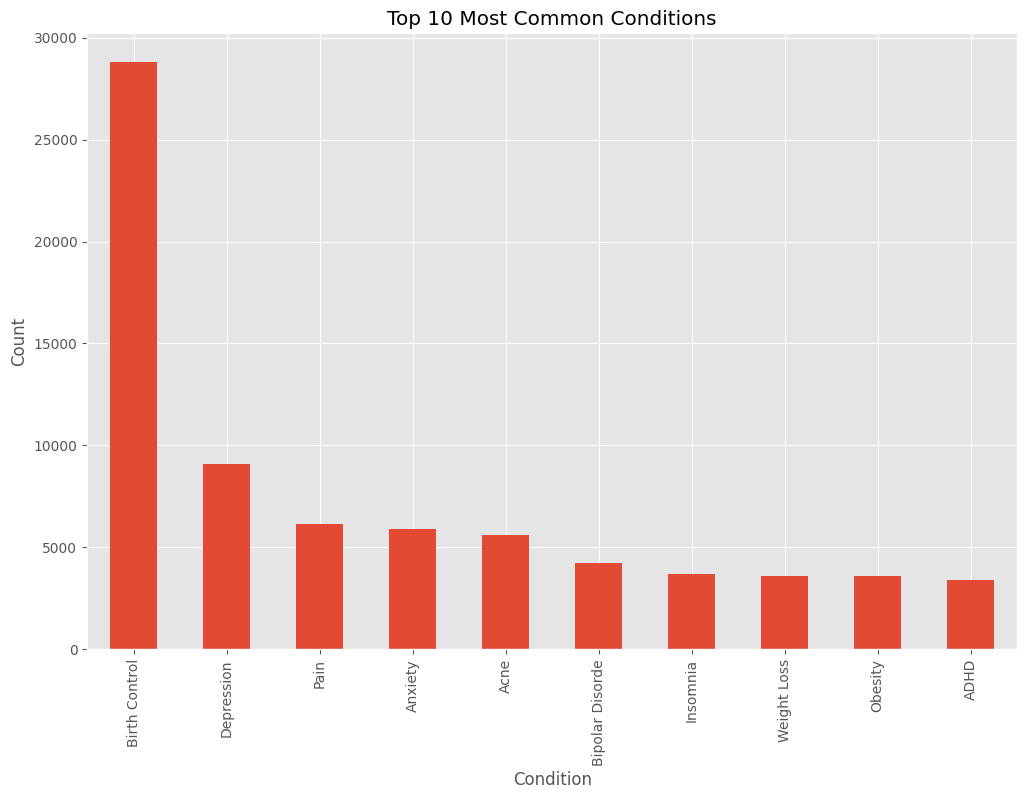

In [15]:
conditions[:10].plot(kind='bar')
plt.title('Top 10 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

**Rating Distribution**

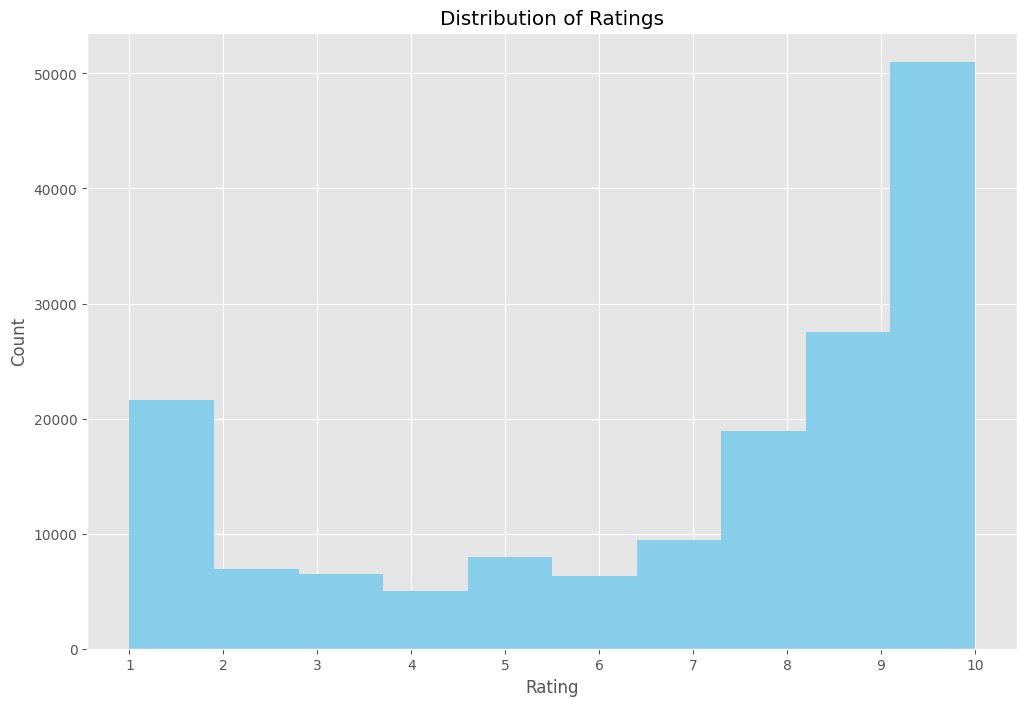

In [16]:
# Look at bias in review(also shown on 'Data' page in competition:distribution of ratings)
train.rating.hist(color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1,11)]);

This distribution illustrates that people generally write reviews for drugs they really like(or those that they really dislike) There are fewer middle ratings as compared to extreme ratings.